### Load Modules

In [4]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### prepare and collect data 

In [2]:
import os

path = os.listdir('C:/Users/nitin/Documents/nlp/college project/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1 ,'meningioma_tumor':2 ,'glioma_tumor':3 } 

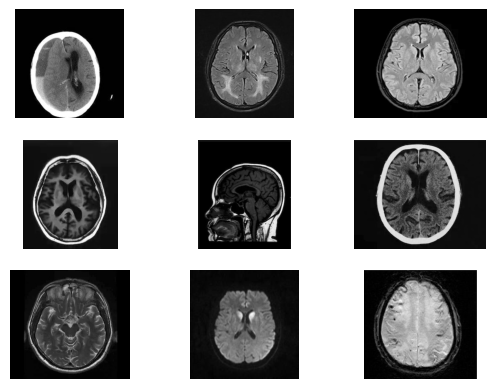

In [5]:
c=1
for i in os.listdir('C:/Users/nitin/Documents/nlp/college project/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    img = cv2.imread('C:/Users/nitin/Documents/nlp/college project/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [4]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'C:/Users/nitin/Documents/nlp/college project/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [5]:
X = np.array(X)
Y = np.array(Y)

In [6]:
X[1003]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
np.unique(Y)

array([0, 1, 2, 3])

In [8]:
pd.Series(Y).value_counts()

1    827
3    826
2    822
0    395
dtype: int64

In [9]:
X.shape

(2870, 200, 200)

### Visualize data

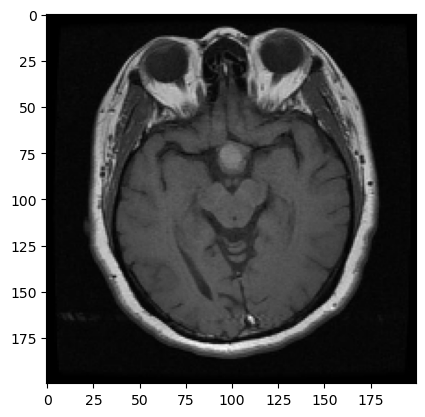

In [10]:
plt.imshow(X[1009], cmap='gray')

### Prepare data

In [11]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(2870, 40000)

### Split Data

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [13]:
xtrain.shape, xtest.shape

((2296, 40000), (574, 40000))

### Feature Scaling

In [14]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


### Feature Selection: PCA

In [15]:
from sklearn.decomposition import PCA

In [16]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(2296, 40000) (574, 40000)


In [17]:
# print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

### Train Model

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [19]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)


LogisticRegression(C=0.1)

In [20]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

### Evaluation

In [21]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 0.9995644599303136
Testing Score: 0.7787456445993032


In [22]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9412020905923345
Testing Score: 0.8344947735191638


### Prediction

In [ ]:
pred = sv.predict(xtest)


In [ ]:
misclassified=np.where(ytest!=pred)
misclassified

In [25]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[9],ytest[9])

Total Misclassified Samples:  45
1 1


### TEST MODEL

In [26]:
dec = {0:'No_Tumor', 1:'pituitary_tumor', 2:'meningioma_tumor', 3:'glioma_tumor'} 

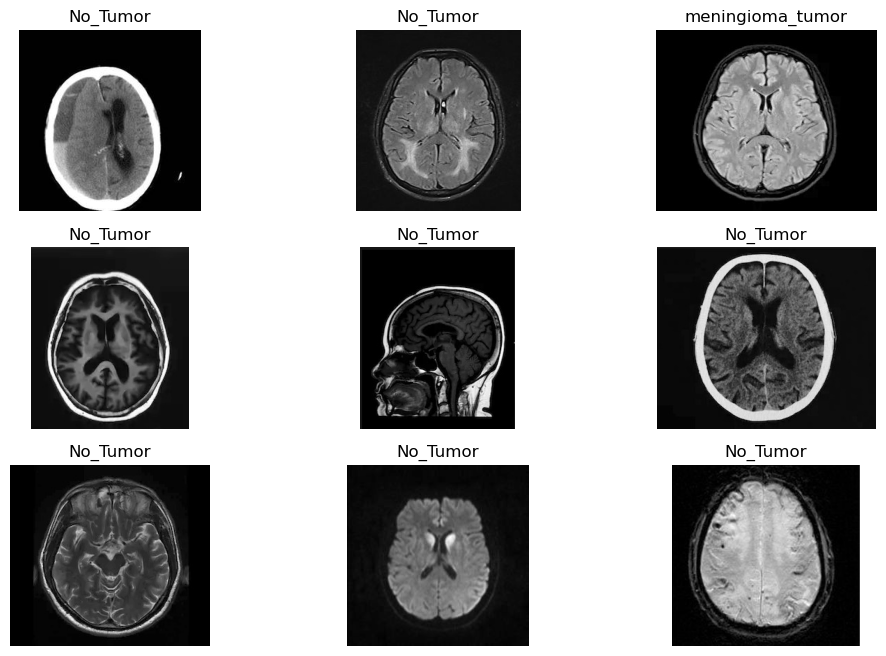

In [27]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/nitin/Documents/nlp/college project/Testing/')
c=1
for i in os.listdir('C:/Users/nitin/Documents/nlp/college project/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('C:/Users/nitin/Documents/nlp/college project/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

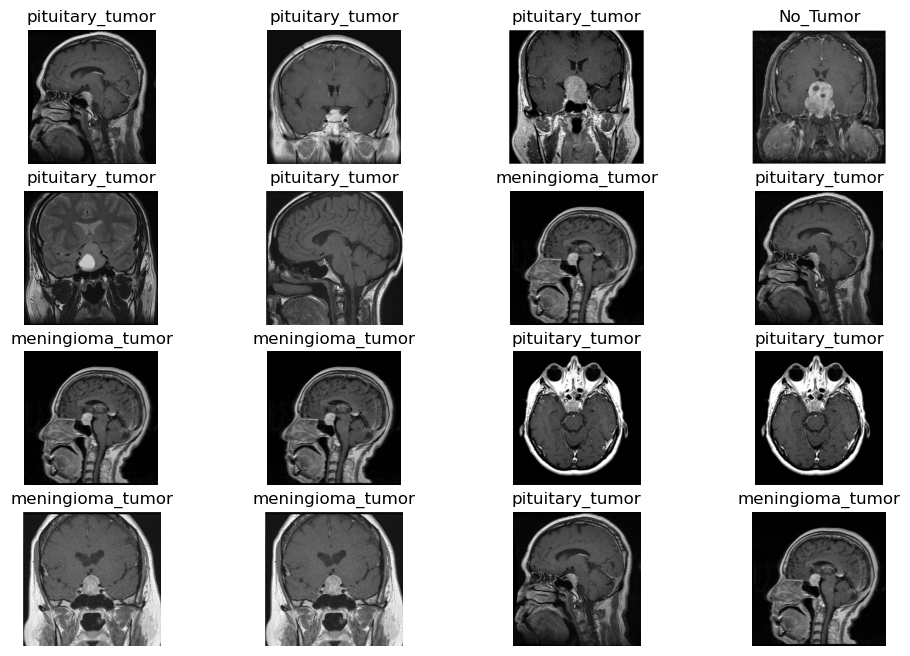

In [28]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/nitin/Documents/nlp/college project/Testing/')
c=1
for i in os.listdir('C:/Users/nitin/Documents/nlp/college project/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('C:/Users/nitin/Documents/nlp/college project/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

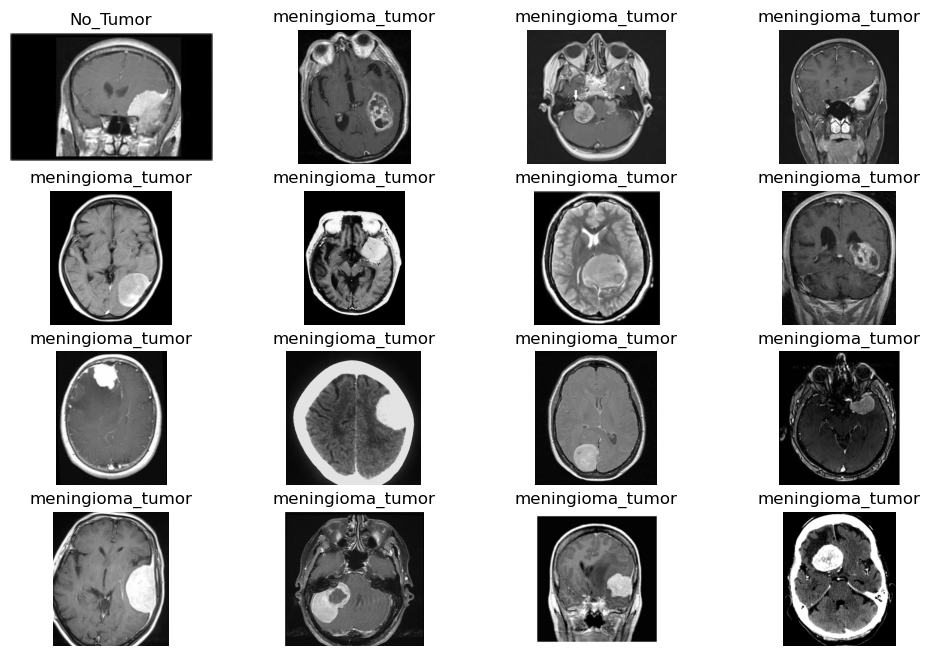

In [29]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/nitin/Documents/nlp/college project/Testing/')
c=1
for i in os.listdir('C:/Users/nitin/Documents/nlp/college project/Testing/meningioma_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('C:/Users/nitin/Documents/nlp/college project/Testing/meningioma_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [1]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/nitin/Documents/nlp/college project/Testing/')
c=1
for i in os.listdir('C:/Users/nitin/Documents/nlp/college project/Testing/glioma_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('C:/Users/nitin/Documents/nlp/college project/Testing/glioma_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1 

" plt.figure(figsize=(12,8))\np = os.listdir('C:/Users/nitin/Documents/nlp/college project/Testing/')\nc=1\nfor i in os.listdir('C:/Users/nitin/Documents/nlp/college project/Testing/glioma_tumor/')[:16]:\n    plt.subplot(4,4,c)\n    \n    img = cv2.imread('C:/Users/nitin/Documents/nlp/college project/Testing/glioma_tumor/'+i,0)\n    img1 = cv2.resize(img, (200,200))\n    img1 = img1.reshape(1,-1)/255\n    p = sv.predict(img1)\n    plt.title(dec[p[0]])\n    plt.imshow(img, cmap='gray')\n    plt.axis('off')\n    c+=1 "

In [32]:
import pickle

In [34]:
with open ('brain_tumor','wb') as f:
    pickle.dump(sv,f)